### Calculate the efficient frontier of a group of portfolios composet of two assets

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Begin by extracting data:

assets = ['PG', '^GSPC']
pf_data = pd.read_csv('C:/Users/mdx/Documents/Python/Python for Finance Investment Fundamentals & Data Analytics_Udemy/Markowitz_Data.csv', 
index_col = 'Date')

In [2]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


In [3]:
#data from web

assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


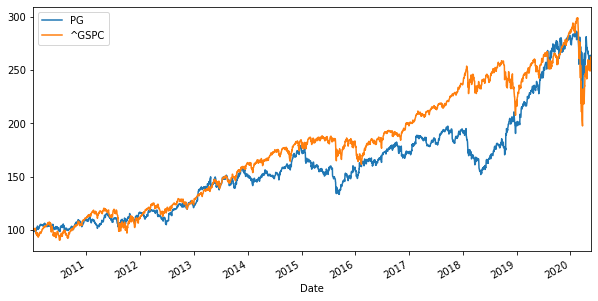

In [6]:
#normalizing ti 100 and plotting

(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10, 5))

In [7]:
#Calculate their logarithmic returns:
    
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.088938
^GSPC    0.091508
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029502,0.017868
^GSPC,0.017868,0.030320


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597431
^GSPC,0.597431,1.000000


In [11]:
#Create a variable that carries the number of assets in your portfolio:

num_assets = len(assets)
num_assets

2

In [20]:
#The portfolio need not be equally weighted. 
#So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. 
#Don’t forget these values should be neither smaller than 0 nor equal or greater than 1!

arr = np.random.random(2)
arr 

array([0.76578474, 0.04914549])

In [21]:
arr[0] + arr[1]#the sum must end to 1 so:

0.8149302331346012

In [24]:
weights = np.random.random(num_assets)
weights /= np.sum(weights) # weights = weights / np.sum(weights) ###np.sum not as sum functrin; it is a multidimensional function
weights

array([0.35190888, 0.64809112])

In [25]:
#Sum the obtained values to obtain 1 – summing up the weights to 100%!:

weights[0] + weights[1]

1.0

### Estimate the expected Portfolio Return, Variance, and Volatility

In [26]:
#Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

0.09060332648097642

In [27]:
#Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.024538707565984866

In [28]:
#Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15664835641009728

### Considering 1000 different combinations of possible portfolios of the same two assets

In [30]:
#Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values 
#for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively:

pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.09056145427979055,
  0.09135047596301386,
  0.08942284836837867,
  0.09056006356465422,
  0.0904010127607414,
  0.09043080301468444,
  0.09012566825557262,
  0.0908190866899873,
  0.09073480139397638,
  0.0894119443761626,
  0.08981949810642212,
  0.08975298845379537,
  0.09085719024704982,
  0.08997672744219887,
  0.09026565492644648,
  0.08995103963421798,
  0.09017236179964708,
  0.08915973936477416,
  0.09075154436243561,
  0.08963349984752175,
  0.09072919048874327,
  0.09021228923557167,
  0.0901200483801168,
  0.08914624158020153,
  0.09062310157454602,
  0.08986974192828286,
  0.0891916072859014,
  0.09094641320082728,
  0.08947237628959612,
  0.09005363940013461,
  0.0907151971111394,
  0.08999906420016082,
  0.09127323275767099,
  0.0915014045597711,
  0.08987458242275431,
  0.08983701783244752,
  0.09123718067232742,
  0.09057835714788029,
  0.0894955202129516,
  0.08962364086388529,
  0.09000429622418413,
  0.09026173351433568,
  0.08998091604090422,
  0.090940937288860

In [35]:
#Transform the obtained lists into NumPy arrays:

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09056145, 0.09135048, 0.08942285, 0.09056006, 0.09040101,
        0.0904308 , 0.09012567, 0.09081909, 0.0907348 , 0.08941194,
        0.0898195 , 0.08975299, 0.09085719, 0.08997673, 0.09026565,
        0.08995104, 0.09017236, 0.08915974, 0.09075154, 0.0896335 ,
        0.09072919, 0.09021229, 0.09012005, 0.08914624, 0.0906231 ,
        0.08986974, 0.08919161, 0.09094641, 0.08947238, 0.09005364,
        0.0907152 , 0.08999906, 0.09127323, 0.0915014 , 0.08987458,
        0.08983702, 0.09123718, 0.09057836, 0.08949552, 0.08962364,
        0.0900043 , 0.09026173, 0.08998092, 0.09094094, 0.09068002,
        0.09069918, 0.09022376, 0.09140018, 0.08954969, 0.09085953,
        0.0901003 , 0.08946219, 0.0911907 , 0.08962881, 0.09100958,
        0.0899955 , 0.09071142, 0.09147832, 0.09122045, 0.0901227 ,
        0.09087489, 0.09052824, 0.09013942, 0.09008077, 0.08978684,
        0.09014662, 0.08975805, 0.09010247, 0.08950093, 0.09025801,
        0.08983482, 0.09103799, 0.08996374, 0.09

In [36]:
#Create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values 
#are the NumPy arrays pf_returns and pf_volatilities:

portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [37]:
portfolios.head()

,Return,Volatility
0,0.090561,0.156255
1,0.091350,0.169957
2,0.089423,0.161144
3,0.090560,0.156242
4,0.090401,0.155119


In [38]:
portfolios.tail()

,Return,Volatility
995,0.090237,0.154580
996,0.089273,0.163934
997,0.089755,0.156642
998,0.090575,0.156374
999,0.090932,0.161081


Text(0, 0.5, 'Expected Return')

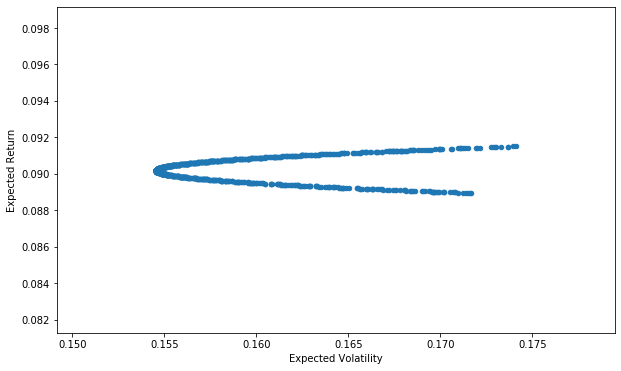

In [39]:
#Plot the data from the portfolios dictionary on a graph:

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [40]:
# Three Companies Exampel:

assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [41]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2020-05-15,125.940002,210.880005,21.820000
2020-05-18,127.660004,213.190002,23.510000
2020-05-19,124.949997,216.880005,22.910000
2020-05-20,125.449997,229.970001,23.620001
2020-05-21,124.989998,231.389999,23.379999


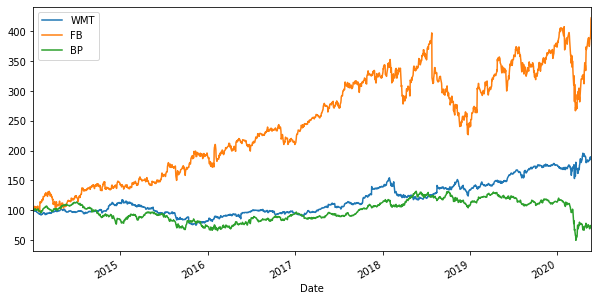

In [42]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [43]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [44]:
log_returns.mean() * 250

WMT    0.096228
FB     0.224340
BP    -0.047464
dtype: float64

In [45]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.043343,0.015346,0.012099
FB,0.015346,0.100758,0.032369
BP,0.012099,0.032369,0.087560


In [46]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.232212,0.19639
FB,0.232212,1.000000,0.34462
BP,0.196390,0.344620,1.00000


In [47]:
num_assets = len(assets)

In [48]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.4112305 , 0.42715134, 0.16161816])

In [49]:
weights[0] + weights[1] + weights[2]

1.0

In [50]:
np.sum(weights * log_returns.mean()) * 250

0.12772789216998748

In [51]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.039469654966803804

In [52]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19866971325998284

In [53]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.04303516,  0.11171125,  0.09490821,  0.08936771,  0.09748113,
         0.05710319,  0.1061026 ,  0.13297838,  0.02026681,  0.09275895,
         0.08812883,  0.08787171, -0.00913496,  0.08233504,  0.14703547,
         0.13385256,  0.14025036,  0.05330299,  0.04983399,  0.17127082,
         0.06319695,  0.15953793,  0.10150222,  0.09254798,  0.02624506,
         0.0429904 ,  0.07386175,  0.09185989,  0.1008472 ,  0.11817043,
         0.00711574, -0.01410614,  0.17673377,  0.04259671,  0.08457414,
         0.06737152,  0.0887403 ,  0.13984758,  0.06619626,  0.16197737,
         0.05955662,  0.13789198,  0.097604  ,  0.0315341 ,  0.08407971,
         0.11679055,  0.13970446,  0.06924029,  0.07916365,  0.13602889,
         0.04683733,  0.09630085,  0.10459782,  0.07884339,  0.08960372,
         0.09701007,  0.14963209,  0.17712761,  0.10976896,  0.07795094,
         0.11488755,  0.08437787,  0.08879101,  0.13922362,  0.1100767 ,
         0.10109763,  0.1013675 ,  0.02460196,  0.1

In [55]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.043035,0.229030
1,0.111711,0.183033
2,0.094908,0.195259
3,0.089368,0.200441
4,0.097481,0.188810


Text(0, 0.5, 'Expected Return')

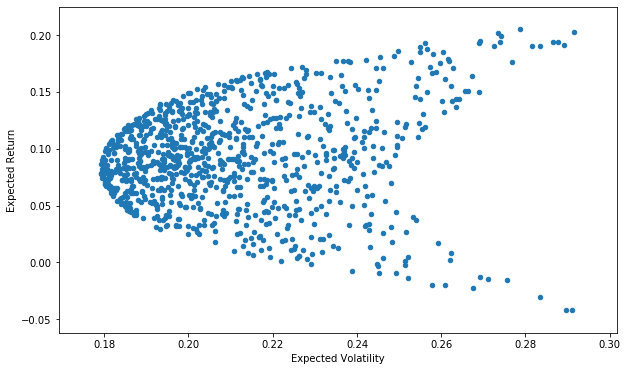

In [56]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')